# **Experiment 1: Fog computing on 20 Tasks**

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import random
random.seed(119)
import scipy
from scipy.stats import poisson

**Initializing variables**

In [ ]:
# Number of edge devices (assumption: each edge device has only one task)
task_num = 20 
# Number of Fog Nodes for offloading the tasks
fn_num = 5  
# Number of Task types (INT operations, FLOAT operations, etc.)
task_type_num = 4

**Creating an environment of Fog Nodes and Edge Devices**

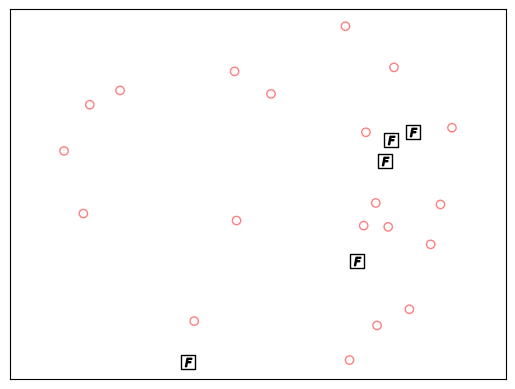

In [ ]:
# Creating randomized 2D plot for placing the Fog nodes and Edge Devices
boundary = 100 
xx0=0; yy0=0; 
areaTotal=np.pi*boundary**2; 
lambda0=0; 
numbPoints = 0

while(numbPoints < task_num + fn_num+2):
  numbPoints = scipy.stats.poisson( lambda0*areaTotal).rvs()
  lambda0 = lambda0 + 0.001

theta = 2*np.pi*scipy.stats.uniform.rvs(0,1,((numbPoints,1)))
rho = boundary*np.sqrt(scipy.stats.uniform.rvs(0,1,((numbPoints,1))))
xx = rho * np.cos(theta)
yy = rho * np.sin(theta)
xx=xx+xx0; yy=yy+yy0;
[fog_nodes_x, edge_devices_x, _] = np.split(xx,[fn_num, fn_num+task_num]) 
[fog_nodes_y, edge_devices_y, _] = np.split(yy,[fn_num, fn_num+task_num])

# Plotting the Fog Nodes and Edge Devices using a scatter plot

plt.scatter(fog_nodes_x,fog_nodes_y, edgecolor='black', facecolor='white', alpha=1, marker = "s",s=100 )
plt.scatter(fog_nodes_x,fog_nodes_y, edgecolor='black', facecolor='white', alpha=1, marker = "$F$" )
plt.scatter(edge_devices_x,edge_devices_y, edgecolor='red', facecolor='none', alpha=0.5 )

plt.axis('equal')
plt.xticks([])
plt.yticks([])

assert(len(edge_devices_x) == task_num)
assert(len(fog_nodes_x) == fn_num)

**Color Mapping for Fog Nodes**

In [ ]:
# List for storing the mapping of each task to their respective fog nodes
fog_mapping = []

# List for having a color for each Fog Node to show which edge devices(tasks) 
# are assigned to which Fog Node
color_mapping = dict()
for i in range(task_num):
  fog_mapping.append(-1)

color_mapping[0] = "blue"
color_mapping[1] = "green"
color_mapping[2] = "red"
color_mapping[3] = "brown"
color_mapping[4] = "cyan"
color_mapping[5] = "orange"
color_mapping[6] = "purple"
color_mapping[7] = "blue"
color_mapping[8] = "pink"
color_mapping[9] = "gray"

print(color_mapping)

{0: 'blue', 1: 'green', 2: 'red', 3: 'brown', 4: 'cyan', 5: 'orange', 6: 'purple', 7: 'blue', 8: 'pink', 9: 'gray'}


**Function to plot the instantaneous task allocation**

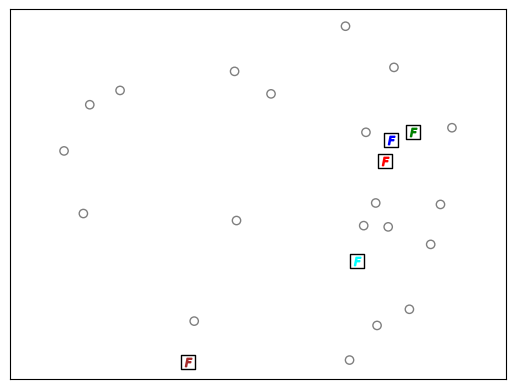

In [ ]:
# Creating a function to plot the Allocation of tasks to fog nodes in each 
# allocation
def PlotSimulation():

  plt.scatter(fog_nodes_x,fog_nodes_y, edgecolor='black', facecolor='white', alpha=1, marker = "s",s=100 )
  
  for i in range(fn_num):
    plt.scatter(fog_nodes_x[i],fog_nodes_y[i], edgecolor=color_mapping[i], facecolor='white', alpha=1, marker = "$F$" )

  # Assigning color to tasks based on the fog node to which it is alloted
  for i in range(task_num):
    if fog_mapping[i] == -1:  
      plt.scatter(edge_devices_x[i],edge_devices_y[i], edgecolor='black', facecolor='none', alpha=0.5 )
      continue
    plt.scatter(edge_devices_x[i],edge_devices_y[i], edgecolor=color_mapping[fog_mapping[i]], facecolor=color_mapping[fog_mapping[i]], alpha=0.5 )

  plt.axis('equal')
  plt.xticks([])
  plt.yticks([])
  plt.show()

PlotSimulation()

**Calculate Communication Cost between Fog nodes and Edge devices**

In [ ]:
# List for storing the communication cost of the links between each fog node and 
# edge device.
comm_cost = []

# Assumption:  Communication cost is the euclidean distance between the fog node 
# and edge device
for i in range(fog_nodes_x.shape[0]):
  distances = []
  for j in range(edge_devices_x.shape[0]):
    p1 = [fog_nodes_x[i][0],fog_nodes_y[i][0]]
    p2 = [edge_devices_x[j][0],edge_devices_y[j][0]]
    distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
    distances.append(distance)
  comm_cost.append(distances)

**Initializing the Processor speed for Fog nodes**

In [ ]:
# Assigning processor speed for calculating the runtime for task in each fog node
speeds = {"Intel Core i7": 0.0000000002778,"Intel Core i5": 0.0000000003704, "Intel Core i3": 0.0000000004167, "Pentium": 0.0000000005263, "Celeron": 0.00000000035714}
keys=list(speeds.keys())
# print(keys)
fn_compute_speed = [] 
for i in range(fog_nodes_x.shape[0]):
  fn_compute_speed.append(speeds[keys[random.randint(0,4)]])
fn_compute_speed = np.array(fn_compute_speed)
print(fn_compute_speed)

[4.1670e-10 3.7040e-10 3.5714e-10 3.5714e-10 5.2630e-10]


**Initializing no of instructions for each task**

In [ ]:
# List for storing the number of instructions performed by each task
instructions_task_type = []
for i in range(task_type_num):
  instructions_task_type.append(random.randint(100,500))
instructions = []
for i in range(edge_devices_x.shape[0]):
  instructions.append(instructions_task_type[random.randint(0,len(instructions_task_type)-1)])

instructions_task_type

[155, 140, 319, 422]

**Calculating the runtime time for each task in each Fog node**

In [ ]:
# List to store the execution time based on the processor speed and the 
# number of instructions
ed_fn_runtime = [] 
for i in range(fog_nodes_x.shape[0]):
  times = []
  for j in range(edge_devices_x.shape[0]):
    times.append(instructions[j]*fn_compute_speed[i])
  ed_fn_runtime.append(times)
ed_fn_runtime = np.array(ed_fn_runtime)
print(ed_fn_runtime)

# max_exec_time = []
# for temp in ed_fn_runtime:
#   max_exec_time.append(np.sum(temp))

# max_exec_time = np.max(max_exec_time)
# print(f"MAX Possible time - {max_exec_time}")

[[5.8338000e-08 5.8338000e-08 1.3292730e-07 1.3292730e-07 5.8338000e-08
  1.7584740e-07 6.4588500e-08 1.7584740e-07 1.3292730e-07 1.7584740e-07
  6.4588500e-08 1.3292730e-07 5.8338000e-08 5.8338000e-08 1.7584740e-07
  6.4588500e-08 1.7584740e-07 1.7584740e-07 6.4588500e-08 6.4588500e-08]
 [5.1856000e-08 5.1856000e-08 1.1815760e-07 1.1815760e-07 5.1856000e-08
  1.5630880e-07 5.7412000e-08 1.5630880e-07 1.1815760e-07 1.5630880e-07
  5.7412000e-08 1.1815760e-07 5.1856000e-08 5.1856000e-08 1.5630880e-07
  5.7412000e-08 1.5630880e-07 1.5630880e-07 5.7412000e-08 5.7412000e-08]
 [4.9999600e-08 4.9999600e-08 1.1392766e-07 1.1392766e-07 4.9999600e-08
  1.5071308e-07 5.5356700e-08 1.5071308e-07 1.1392766e-07 1.5071308e-07
  5.5356700e-08 1.1392766e-07 4.9999600e-08 4.9999600e-08 1.5071308e-07
  5.5356700e-08 1.5071308e-07 1.5071308e-07 5.5356700e-08 5.5356700e-08]
 [4.9999600e-08 4.9999600e-08 1.1392766e-07 1.1392766e-07 4.9999600e-08
  1.5071308e-07 5.5356700e-08 1.5071308e-07 1.1392766e-07 1.5

In [ ]:
# List (i, j) to store the waiting time which 
# tells how much time i-th task has to wait before proposing to j-th Fog Node again.
ed_fn_wait_time = np.zeros((edge_devices_x.shape[0],fog_nodes_x.shape[0]))

**Function to Calculate the Preference List for both Fog Node and Edge Device**


In [ ]:
ED_preference_list = []
FN_preference_list = []
def CalculatePreference():
  # List to store the preference list of each Edge Devices
  for j in range(edge_devices_x.shape[0]):
    ed_preferencs = []
    for i in range(fog_nodes_x.shape[0]):
      ed_preferencs.append(1/(comm_cost[i][j]+10_000_000*ed_fn_wait_time[j][i]))
    ED_preference_list.append(ed_preferencs)

  # List to store the preference list of each Fog Node
  for i in range(fog_nodes_x.shape[0]):
    fn_preferencs = []
    for j in range(edge_devices_x.shape[0]):
      fn_preferencs.append(1/(comm_cost[i][j]+10_000_000*ed_fn_wait_time[j][i]+10_000_000*ed_fn_runtime[i][j]))
    FN_preference_list.append(fn_preferencs)

**Calling the function to calculate the preference list**

In [ ]:
CalculatePreference()

**Randomizing the maximum capacity of the tasks that Fog nodes can compute in parallel**

In [ ]:
# List to store maximum number of tasks that Fog Node can accept to process them
# in parallel 
max_limits = []
for i in range(fn_num):
  max_limits.append(random.randint(1,2))

## **Proposed Algorithm for offloading tasks to Fog nodes**

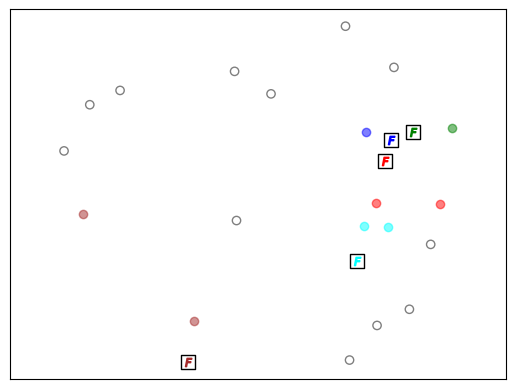

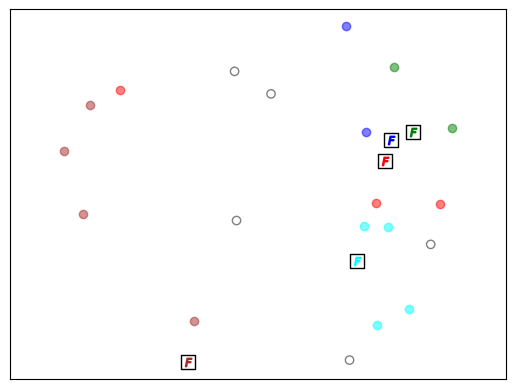

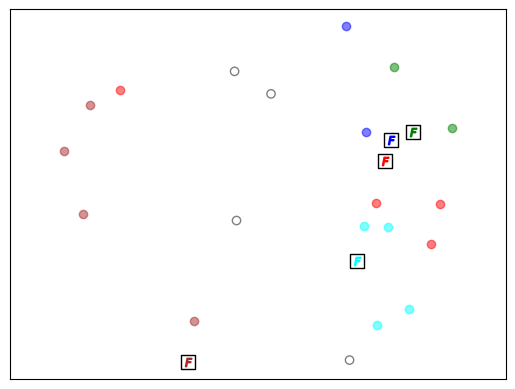

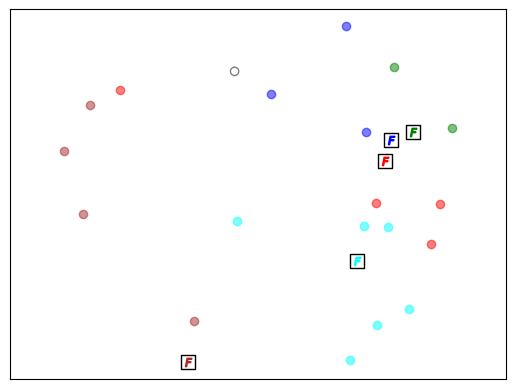

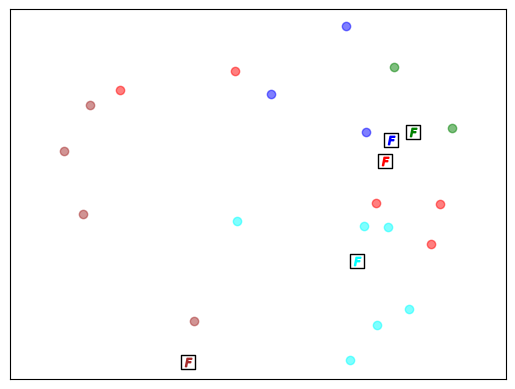

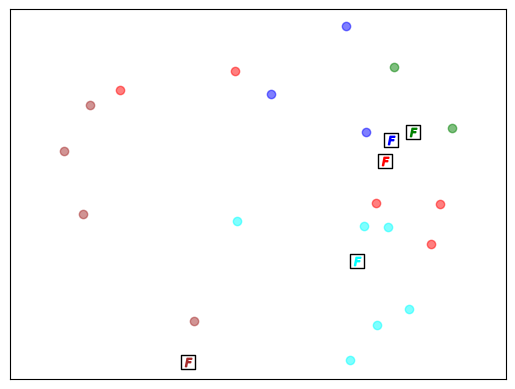

In [ ]:
# Initializing the variables
total_tasks = task_num
task_completed_num = 0
# Used as a timer variable
global_clock = 0
# Boolean dictionary to check if Fog nodes are assigned a task
allocated = {}
# Dictionary to store the completion time of each task
task_complete_time = dict() 
# Dictionary to store waiting time of each task
task_wait_time = dict()

# Initially setting that no task is alloted
for i in range(task_num):
  allocated[i] = False

# Array of List where each list has elements  
# of the form (x, y), where x -> expected time of completion
# y -> index number of the edge device
task_finish_time = [] 
for j in range(fn_num):
  task_finish_time.append([])

# List where fn_task_requests[i] if of the form [(x1,y1),(x2,y2)..], 
# where x1 -> Inverse sum of communication cost of link, waiting time and time to execute
# y1 -> Index of the task 
fn_task_requests = [] 
for j in range(fn_num):
  fn_task_requests.append([])



# Main working of algorithm until all tasks are offloaded
while task_completed_num < total_tasks:
  
  # Remove tasks that are completed from the alloted tasks list
  for i in range(fn_num):
    task_finish_time_copy = task_finish_time[i].copy()
    for task in task_finish_time_copy:
        if(task[0] <= global_clock):
          task_completed_num=task_completed_num+1
          task_complete_time[task[1]]= global_clock
          task_finish_time[i].remove(task)
  
  # Operations in each edge device
  for i in range(task_num):
    # Check is task is already alloted, if yes, continue with the other tasks
    if allocated[i] == True: 
      continue

    # Variable to store the best preference for i-th edge device 
    # (Preference value of Edge Device based on the inverse sum, index of fog node) 
    best_fn = (-1,-1) 

    for j in range(fn_num):
      # If the max limit for that fog node is reached, then this task will be rejected by that fog node
      if len(task_finish_time[j]) == max_limits[j]: 
        continue
      elif(ED_preference_list[i][j] > best_fn[0]):
        best_fn = (ED_preference_list[i][j],j)

    # Proposing i-th task to the best preferred fog node 
    # Updating the fn_task_requests of best preferred fog node 
    if(best_fn != (-1,-1)):
      fn_task_requests[best_fn[1]].append((FN_preference_list[best_fn[1]][i],i)) 

  # Operations in each fog node
  for j in range(fn_num):
    # Applying DAA algorithm
    # Sorting the Proposals to j-th fog node based on the preference value 
    fn_task_requests[j] = sorted(fn_task_requests[j], reverse=True)
    
    # X represents the number of empty slots in the fog node
    X = max_limits[j] - len(task_finish_time[j])
    total_proposals = len(fn_task_requests[j])

    # Accepting required number of tasks
    for x in range(min(X,total_proposals)):
      task_finish_time[j].append((global_clock+ed_fn_runtime[j][fn_task_requests[j][0][1]],fn_task_requests[j][0][1]))
      # Setting this task as allotcated
      allocated[fn_task_requests[j][0][1]] = True
      # Setting the mapping that this task is allocated to j-th fog node
      fog_mapping[fn_task_requests[j][0][1]] = j
      task_wait_time[fn_task_requests[j][0][1]]=global_clock
      # Removing the task from the proposal Queue as it is alloted 
      fn_task_requests[j].pop(0)
    # Rejecting other tasks 
    fn_task_requests[j] = []


  # Updating waiting times for each task
  for j in range(fn_num):
    
    waiting_time = []
  
    for i in range(len(task_finish_time[j])):
      # Update waiting time by calculating the execution time of already offloaded tasks
      waiting_time.append(task_finish_time[j][i][0]-global_clock)

    if len(waiting_time):
        # The min value of waiting time will be the time till when another slot opens.
      waiting_time = min(waiting_time) 
    else:
      waiting_time = 0.0

    # Each fog nodes inform all non alloted edge devices 
    # their waiting time to send their proposals
    for i in range(task_num):
      if(allocated[i]==False):
        ed_fn_wait_time[i][j] = waiting_time


  # Recalculate preference of each fog node
  CalculatePreference()
  
  # Checking if all nodes are busy by checking if maximum capacity for all node are reached
  all_fog_nodes_busy = True
  for j in range(fn_num):
    if len(task_finish_time[j])==max_limits[j]:
      continue
    else:
      all_fog_nodes_busy = False
      break

  # Checking if all tasks are allocated 
  all_tasks_allocated = True
  for i in range(fn_num):
     if(allocated[i]==False):
       all_tasks_allocated = False
       break

  # Increment the global clock timer
  if all_fog_nodes_busy:
    global_clock += 0.000001
  elif all_tasks_allocated:
    global_clock += 0.000001
  
  # Simulate the offloading for each iteration
  PlotSimulation()


In [ ]:
fog_mapping

[1, 3, 2, 0, 2, 2, 4, 4, 0, 4, 4, 2, 4, 2, 1, 3, 3, 4, 3, 0]

In [ ]:
color_mapping

{0: 'blue',
 1: 'green',
 2: 'red',
 3: 'brown',
 4: 'cyan',
 5: 'orange',
 6: 'purple',
 7: 'blue',
 8: 'pink',
 9: 'gray'}

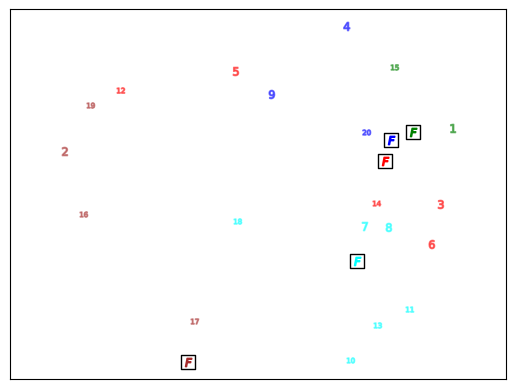

In [ ]:
markers = []
for i in range(task_num):
    markers.append("$"+str(i+1)+"$")

plt.scatter(fog_nodes_x,fog_nodes_y, edgecolor='black', facecolor='white', alpha=1, marker = "s",s=100 )
  
for i in range(fn_num):
    plt.scatter(fog_nodes_x[i],fog_nodes_y[i], edgecolor=color_mapping[i], facecolor='white', alpha=1, marker = "$F$" )

# Assigning color to tasks based on the fog node to which it is alloted
for i in range(task_num):
    if fog_mapping[i] == -1:  
        plt.scatter(edge_devices_x[i],edge_devices_y[i], edgecolor='black', facecolor='none', alpha=0.5,marker =  markers[i])
        continue
    plt.scatter(edge_devices_x[i],edge_devices_y[i], edgecolor=color_mapping[fog_mapping[i]], facecolor=color_mapping[fog_mapping[i]], alpha=0.5,marker =  markers[i] )

plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.show()

# **Experiment 2: Fog computing on 200 tasks**

In [ ]:
#Size of the boundary for showing the fog nodes and edge devices
boundary = 100 
# Number of edge devices (assumption: each edge device has only one task)
task_num = 200
# Number of Fog Nodes for offloading the tasks
fn_num = 5  
# Number of Task types (INT operations, FLOAT operations, etc.)
task_type_num = 4

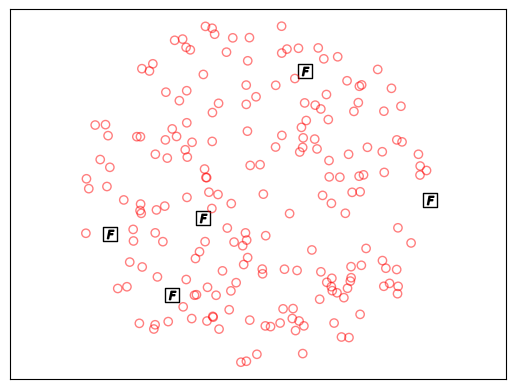

In [ ]:
# Creating randomized 2D plot for placing the Fog nodes and Edge Devices
boundary = 100 
xx0=0; yy0=0; 
areaTotal=np.pi*boundary**2; 
lambda0=0; 
numbPoints = 0

while(numbPoints < task_num + fn_num+2):
  numbPoints = scipy.stats.poisson( lambda0*areaTotal).rvs()
  lambda0 = lambda0 + 0.001

theta = 2*np.pi*scipy.stats.uniform.rvs(0,1,((numbPoints,1)))
rho = boundary*np.sqrt(scipy.stats.uniform.rvs(0,1,((numbPoints,1))))
xx = rho * np.cos(theta)
yy = rho * np.sin(theta)
xx=xx+xx0; yy=yy+yy0;
[fog_nodes_x, edge_devices_x, _] = np.split(xx,[fn_num, fn_num+task_num]) 
[fog_nodes_y, edge_devices_y, _] = np.split(yy,[fn_num, fn_num+task_num])

# Plotting the Fog Nodes and Edge Devices using a scatter plot

plt.scatter(fog_nodes_x,fog_nodes_y, edgecolor='black', facecolor='white', alpha=1, marker = "s",s=100 )
plt.scatter(fog_nodes_x,fog_nodes_y, edgecolor='black', facecolor='white', alpha=1, marker = "$F$" )
plt.scatter(edge_devices_x,edge_devices_y, edgecolor='red', facecolor='none', alpha=0.5 )

plt.axis('equal')
plt.xticks([])
plt.yticks([])

assert(len(edge_devices_x) == task_num)
assert(len(fog_nodes_x) == fn_num)

In [ ]:
# List for storing the mapping of each task to their respective fog nodes
fog_mapping = []

# List for having a color for each Fog Node to show which edge devices(tasks) 
# are assigned to which Fog Node
color_mapping = dict()
for i in range(task_num):
  fog_mapping.append(-1)

color_mapping[0] = "blue"
color_mapping[1] = "green"
color_mapping[2] = "red"
color_mapping[3] = "brown"
color_mapping[4] = "cyan"
color_mapping[5] = "orange"
color_mapping[6] = "purple"
color_mapping[7] = "blue"
color_mapping[8] = "pink"
color_mapping[9] = "gray"

print(color_mapping)

{0: 'blue', 1: 'green', 2: 'red', 3: 'brown', 4: 'cyan', 5: 'orange', 6: 'purple', 7: 'blue', 8: 'pink', 9: 'gray'}


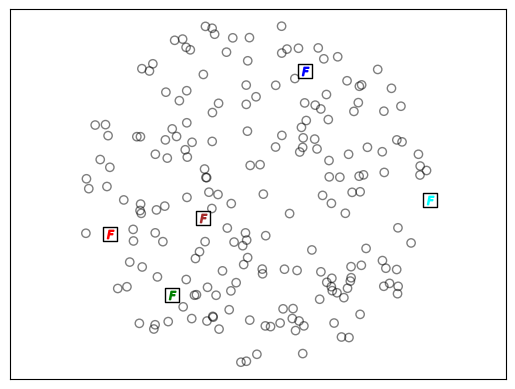

In [ ]:
def PlotSimulation():

  plt.scatter(fog_nodes_x,fog_nodes_y, edgecolor='black', facecolor='white', alpha=1, marker = "s",s=100 )

  for i in range(fn_num):
    plt.scatter(fog_nodes_x[i],fog_nodes_y[i], edgecolor=color_mapping[i], facecolor='white', alpha=1, marker = "$F$" )

  for i in range(task_num):

    if fog_mapping[i] == -1:  
      plt.scatter(edge_devices_x[i],edge_devices_y[i], edgecolor='black', facecolor='none', alpha=0.5 )
      continue
    plt.scatter(edge_devices_x[i],edge_devices_y[i], edgecolor=color_mapping[fog_mapping[i]], facecolor=color_mapping[fog_mapping[i]], alpha=0.5 )

  #plt.xlabel("x"); plt.ylabel("y")
  plt.axis('equal')
  plt.xticks([])
  plt.yticks([])
  plt.show()

  

# fog_mapping[2] = 3
# fog_mapping[5] = 4
PlotSimulation()

In [ ]:
# List for storing the communication cost of the links between each fog node and 
# edge device.
comm_cost = []

# Assumption:  Communication cost is the euclidean distance between the fog node 
# and edge device
for i in range(fog_nodes_x.shape[0]):
  distances = []
  for j in range(edge_devices_x.shape[0]):
    p1 = [fog_nodes_x[i][0],fog_nodes_y[i][0]]
    p2 = [edge_devices_x[j][0],edge_devices_y[j][0]]
    distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
    distances.append(distance)
  comm_cost.append(distances)

In [ ]:
# Assigning processor speed for calculating the runtime for task in each fog node
speeds = {1: 0.0000000002778,2: 0.0000000003704, 3: 0.0000000004167, 4: 0.0000000005263, 5: 0.00000000035714}

fn_compute_speed = [] 
for i in range(fog_nodes_x.shape[0]):
  fn_compute_speed.append(speeds[random.randint(1,5)])
fn_compute_speed = np.array(fn_compute_speed)
print(fn_compute_speed)

[3.5714e-10 3.5714e-10 3.5714e-10 3.5714e-10 3.7040e-10]


In [ ]:
# List for storing the number of instructions performed by each task
instructions_task_type = []
for i in range(task_type_num):
  instructions_task_type.append(random.randint(100,500))
instructions = []
for i in range(edge_devices_x.shape[0]):
  instructions.append(instructions_task_type[random.randint(0,len(instructions_task_type)-1)])

instructions_task_type

[494, 132, 103, 186]

In [ ]:
# List to store the execution time based on the processor speed and the 
# number of instructions
ed_fn_runtime = [] 
for i in range(fog_nodes_x.shape[0]):
  times = []
  for j in range(edge_devices_x.shape[0]):
    times.append(instructions[j]*fn_compute_speed[i])
  ed_fn_runtime.append(times)
ed_fn_runtime = np.array(ed_fn_runtime)
print(ed_fn_runtime)

max_exec_time = []
for temp in ed_fn_runtime:
  max_exec_time.append(np.sum(temp))

max_exec_time = np.max(max_exec_time)
print(f"MAX Possible time - {max_exec_time}")

[[1.7642716e-07 4.7142480e-08 4.7142480e-08 3.6785420e-08 6.6428040e-08
  3.6785420e-08 6.6428040e-08 3.6785420e-08 4.7142480e-08 4.7142480e-08
  4.7142480e-08 6.6428040e-08 4.7142480e-08 6.6428040e-08 3.6785420e-08
  1.7642716e-07 1.7642716e-07 6.6428040e-08 6.6428040e-08 1.7642716e-07
  1.7642716e-07 3.6785420e-08 1.7642716e-07 3.6785420e-08 4.7142480e-08
  3.6785420e-08 3.6785420e-08 6.6428040e-08 4.7142480e-08 3.6785420e-08
  4.7142480e-08 6.6428040e-08 1.7642716e-07 3.6785420e-08 4.7142480e-08
  3.6785420e-08 4.7142480e-08 1.7642716e-07 4.7142480e-08 1.7642716e-07
  1.7642716e-07 6.6428040e-08 4.7142480e-08 4.7142480e-08 4.7142480e-08
  4.7142480e-08 1.7642716e-07 4.7142480e-08 4.7142480e-08 1.7642716e-07
  4.7142480e-08 6.6428040e-08 3.6785420e-08 6.6428040e-08 1.7642716e-07
  6.6428040e-08 3.6785420e-08 4.7142480e-08 4.7142480e-08 6.6428040e-08
  1.7642716e-07 4.7142480e-08 4.7142480e-08 1.7642716e-07 3.6785420e-08
  1.7642716e-07 1.7642716e-07 6.6428040e-08 1.7642716e-07 1.7642

In [ ]:
# List (i, j) to store the waiting time which 
# tells how much time i-th task has to wait before proposing to j-th Fog Node  again.
ed_fn_wait_time = np.zeros((edge_devices_x.shape[0],fog_nodes_x.shape[0]))

In [ ]:
ED_preference_list = []
FN_preference_list = []
def CalculatePreference():
  # List to store the preference list of each Edge Devices
  for j in range(edge_devices_x.shape[0]):
    ed_preferencs = []
    for i in range(fog_nodes_x.shape[0]):
      ed_preferencs.append(1/(comm_cost[i][j]+10_000_000*ed_fn_wait_time[j][i]))
    ED_preference_list.append(ed_preferencs)

  # List to store the preference list of each Fog Node
  for i in range(fog_nodes_x.shape[0]):
    fn_preferencs = []
    for j in range(edge_devices_x.shape[0]):
      fn_preferencs.append(1/(comm_cost[i][j]+10_000_000*ed_fn_wait_time[j][i]+10_000_000*ed_fn_runtime[i][j]))
    FN_preference_list.append(fn_preferencs)

In [ ]:
CalculatePreference()

In [ ]:
# List to store maximum number of tasks that Fog Node can accept to process them
# in parallel 
max_limits = []
for i in range(fn_num):
  max_limits.append(random.randint(1,2))

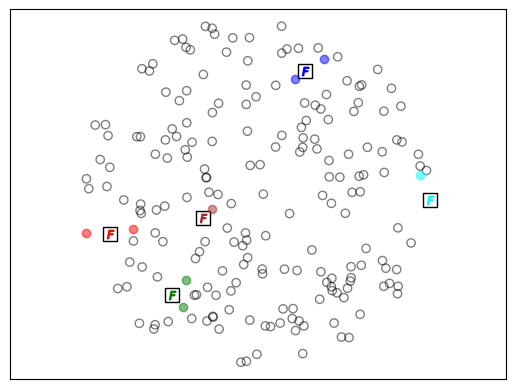

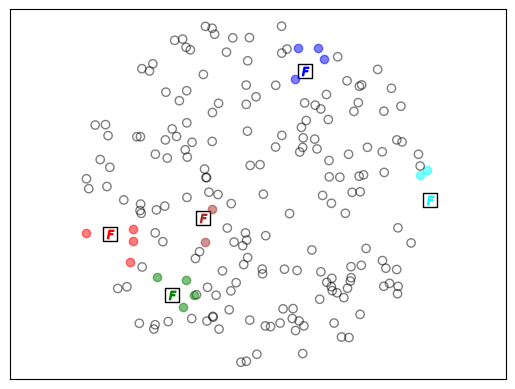

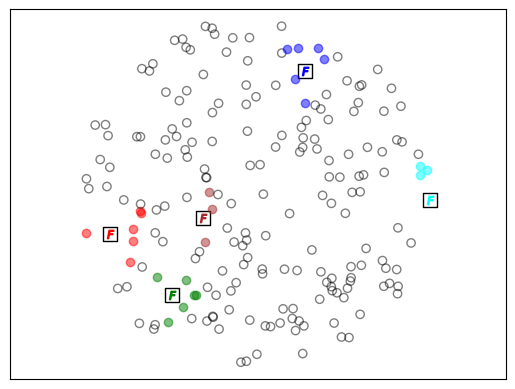

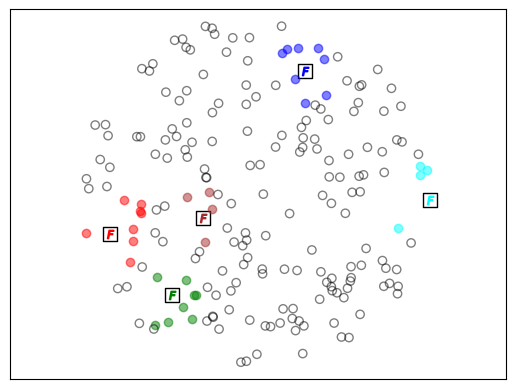

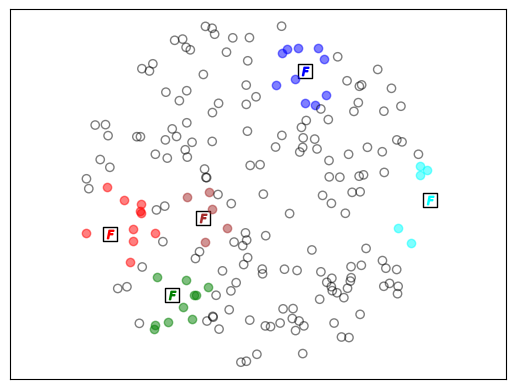

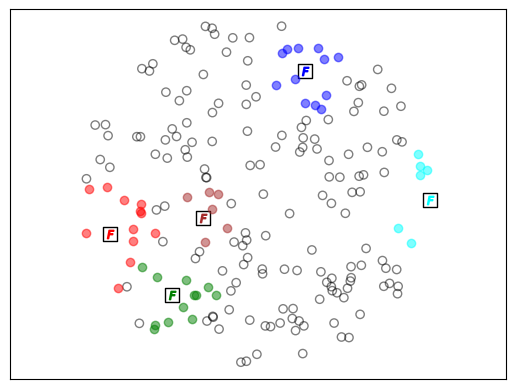

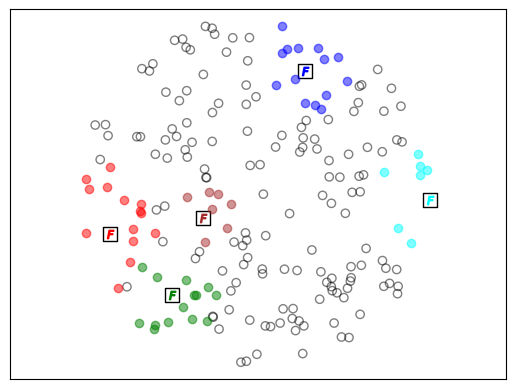

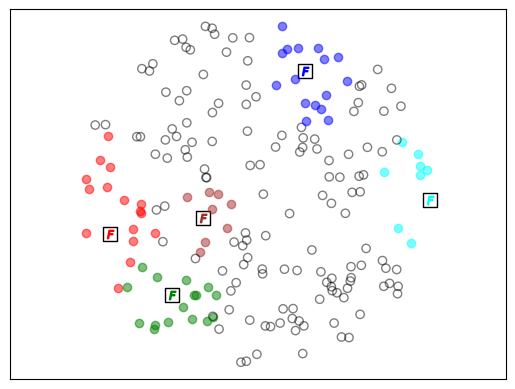

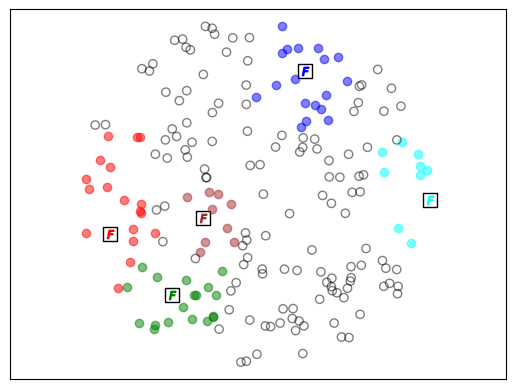

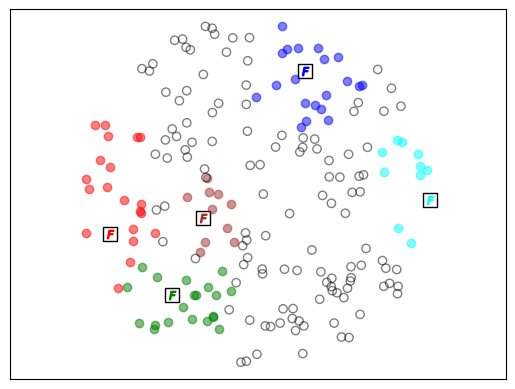

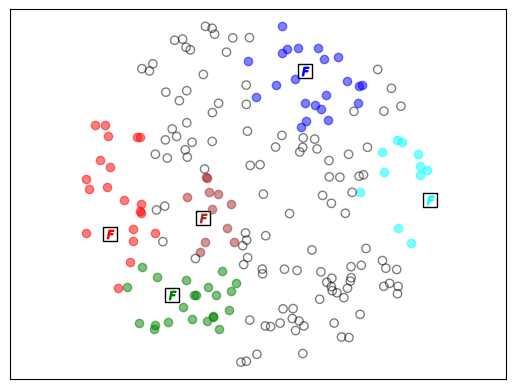

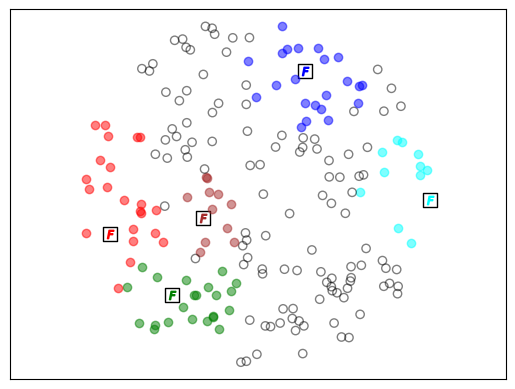

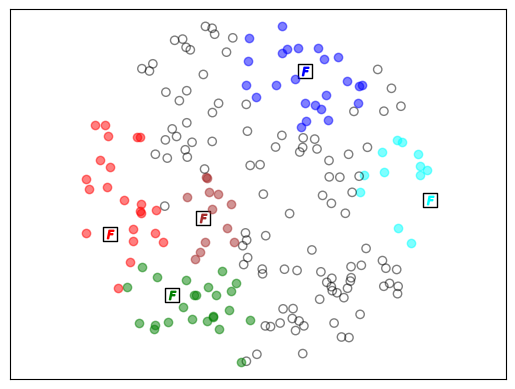

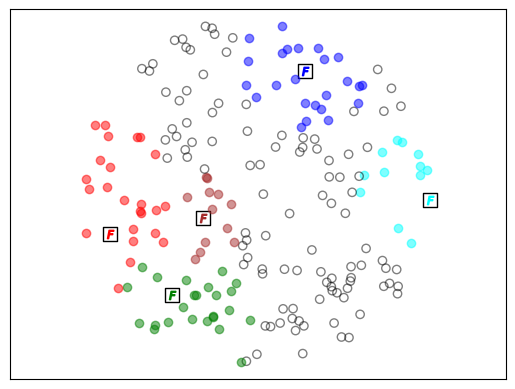

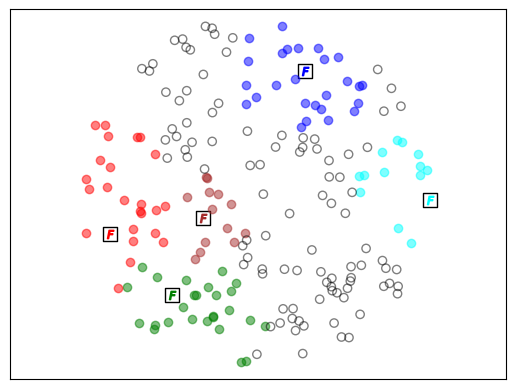

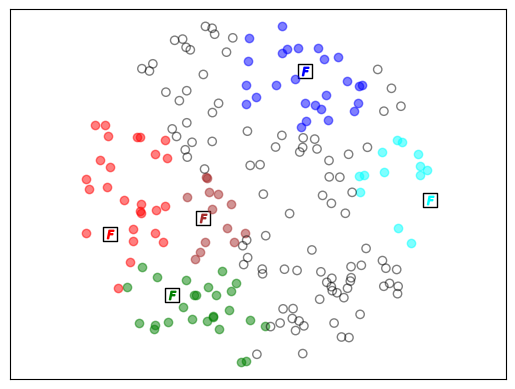

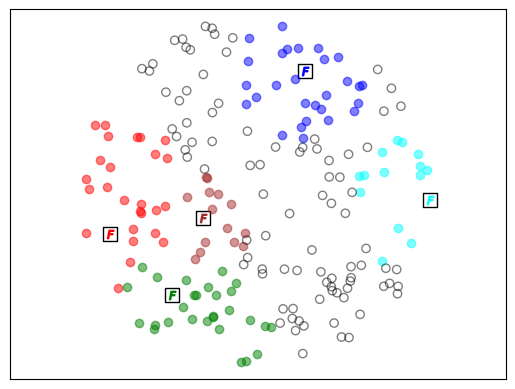

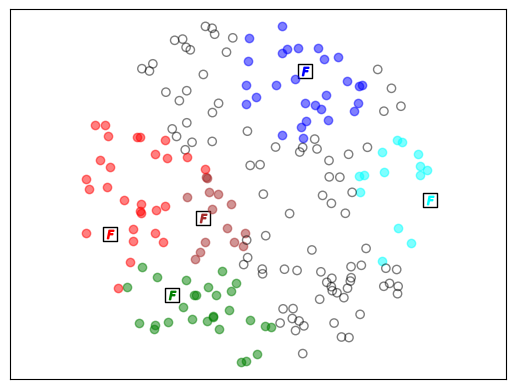

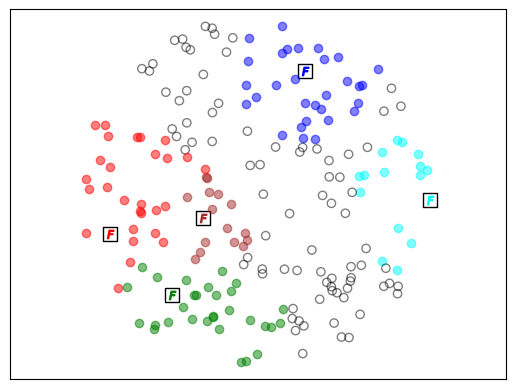

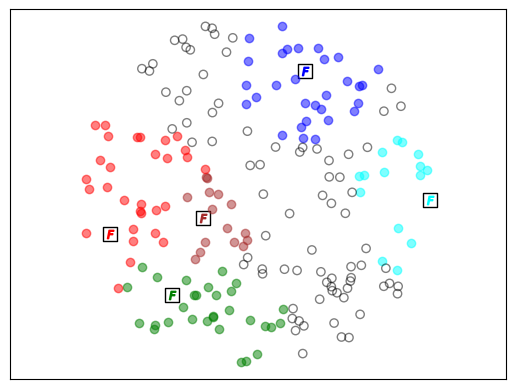

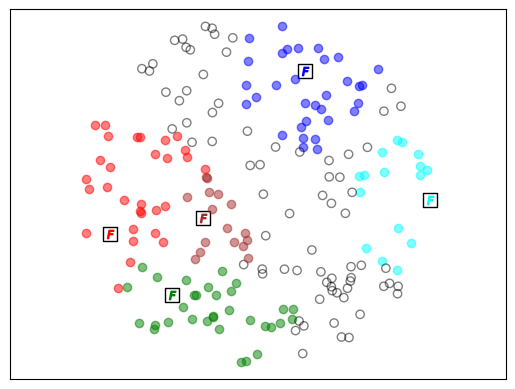

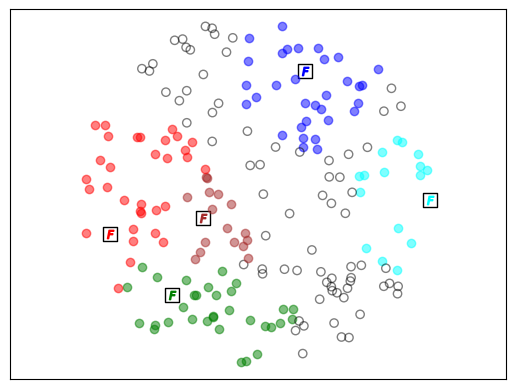

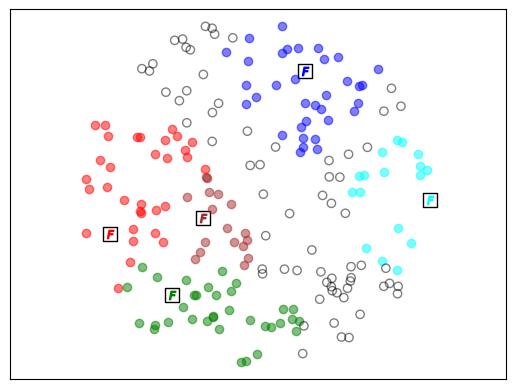

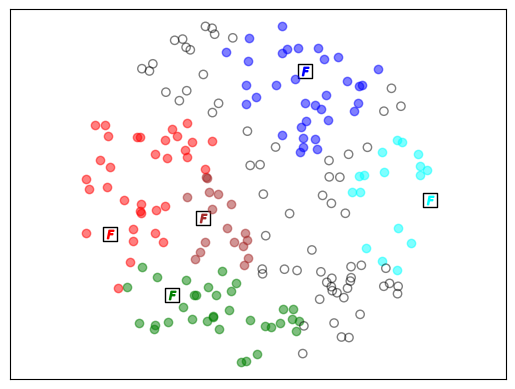

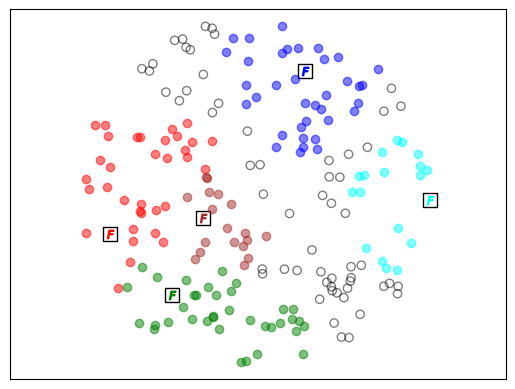

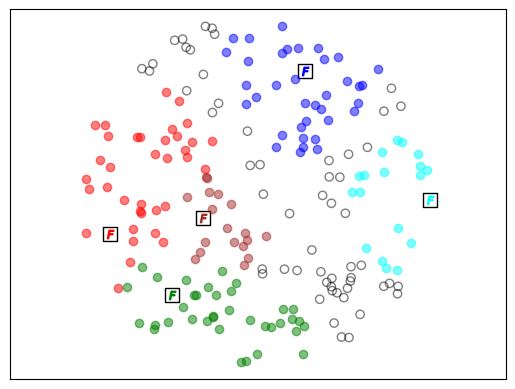

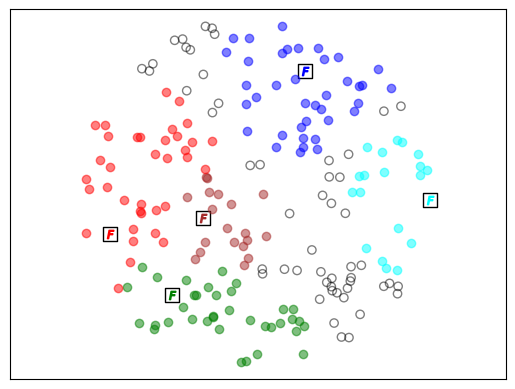

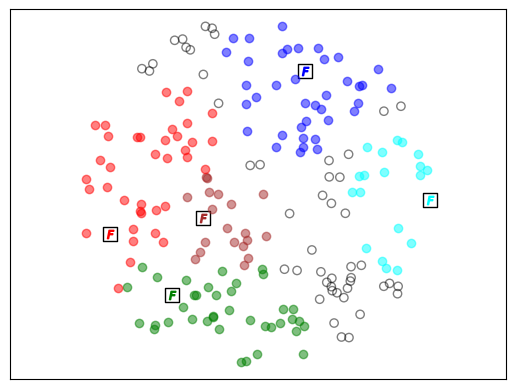

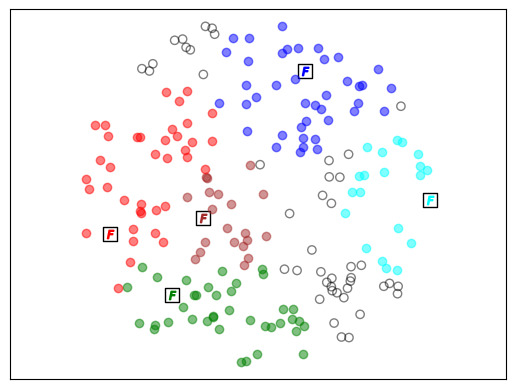

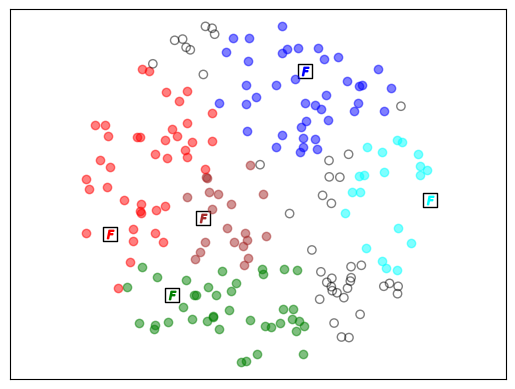

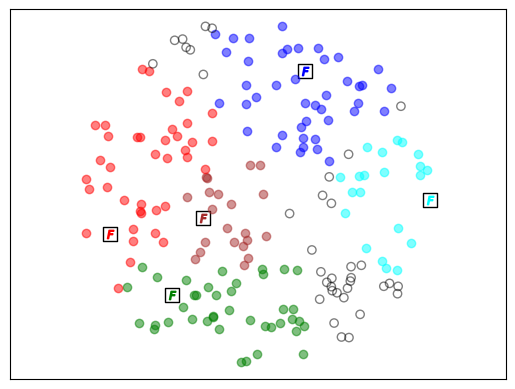

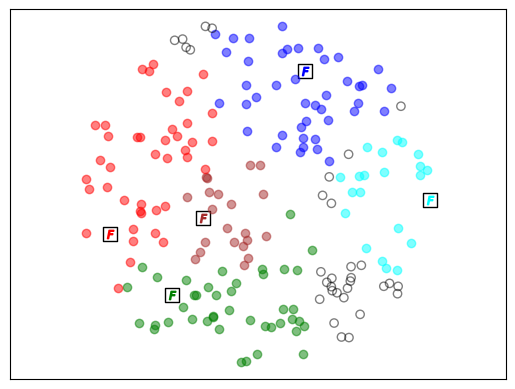

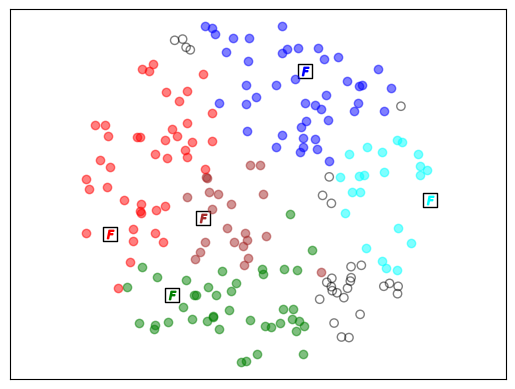

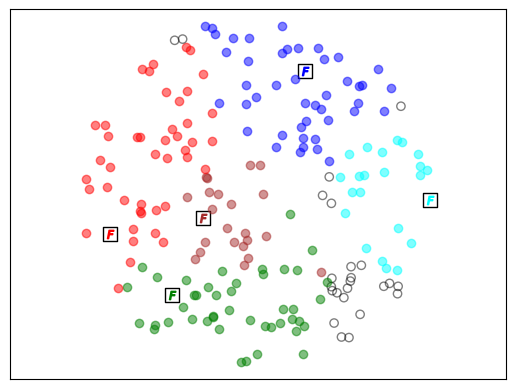

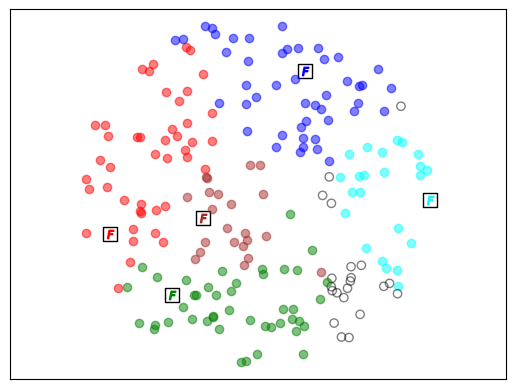

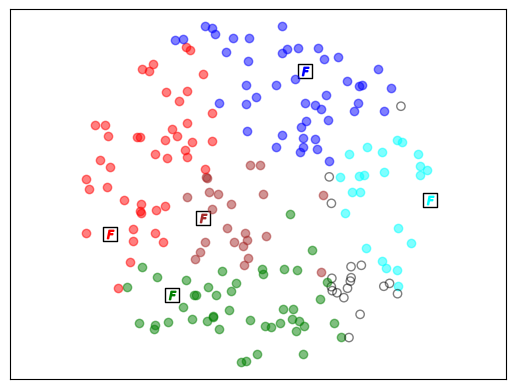

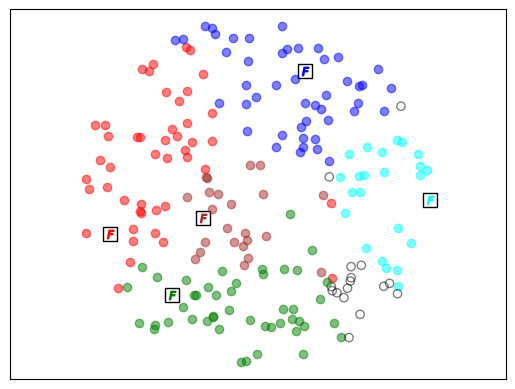

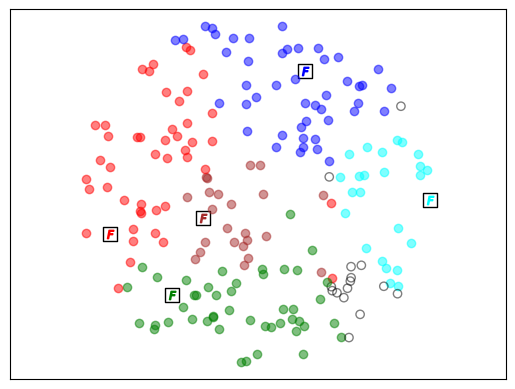

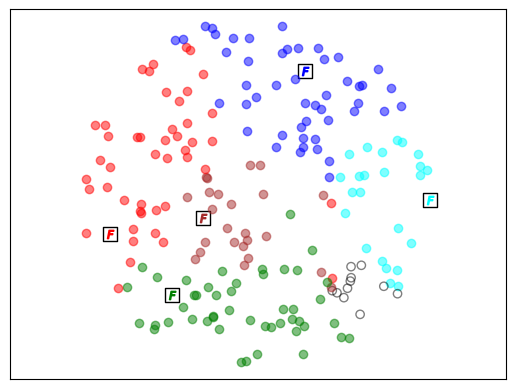

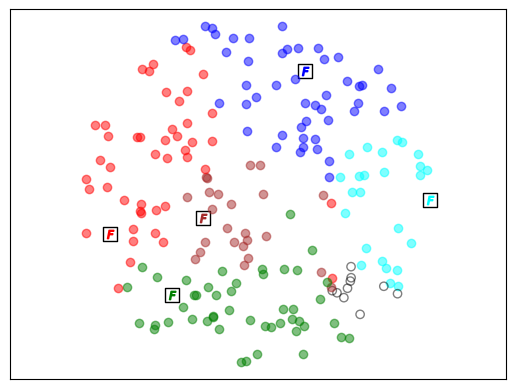

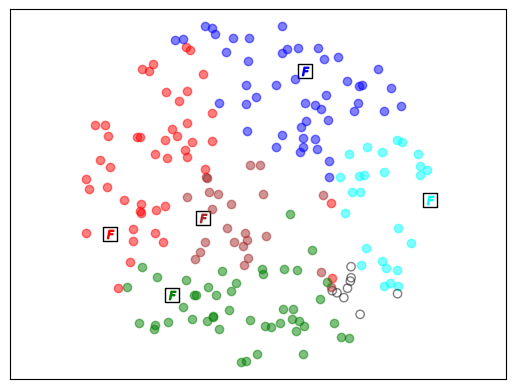

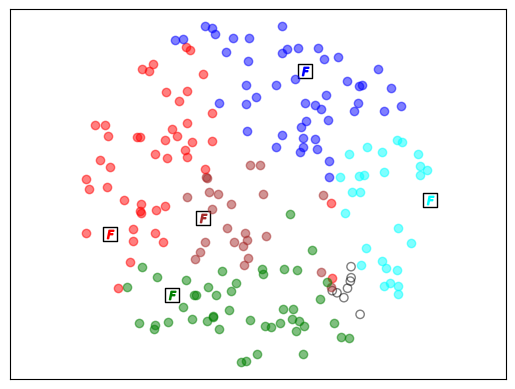

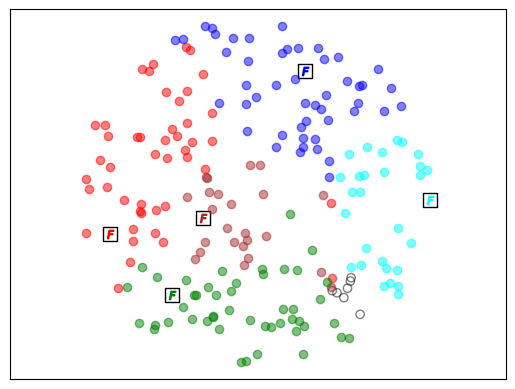

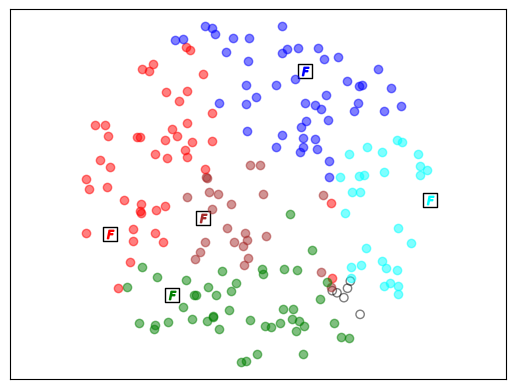

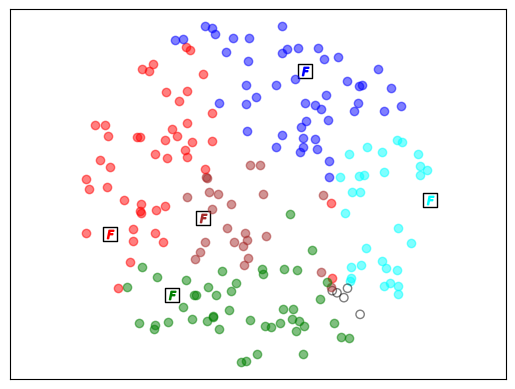

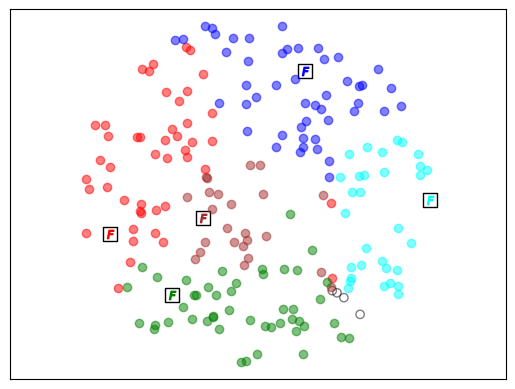

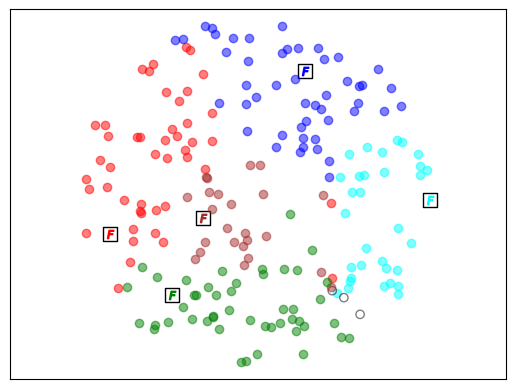

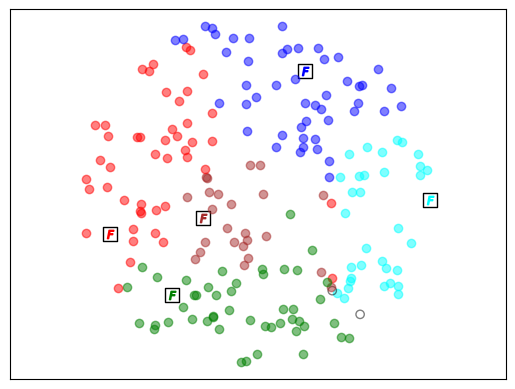

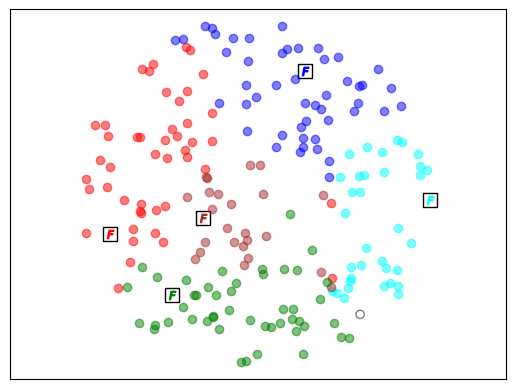

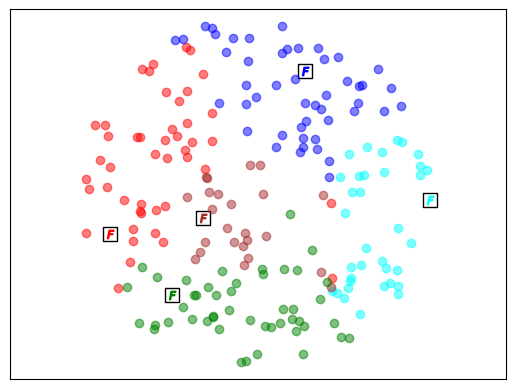

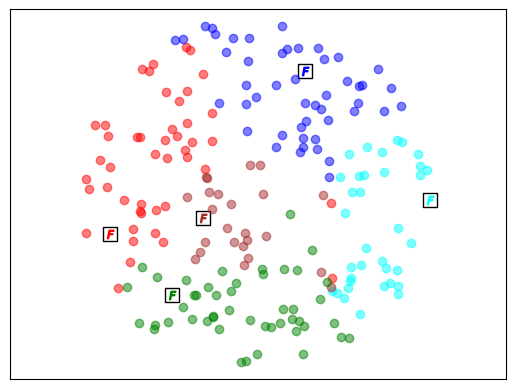

In [ ]:
# Initializing the variables
total_tasks = task_num
task_completed_num = 0
# Used as a timer variable
global_clock = 0
# Boolean dictionary to check if Fog nodes are assigned a task
allocated = {}
# Dictionary to store the completion time of each task
task_complete_time = dict() 
# Dictionary to store waiting time of each task
task_wait_time = dict()

# Initially setting that no task is alloted
for i in range(task_num):
  allocated[i] = False

# List which store of the form (x, y), where x -> expected time of completion
# y -> index number of the edge device
task_finish_time = [] 
for j in range(fn_num):
  task_finish_time.append([])

# List where fn_task_requests[i] if of the form [(x1,y1),(x2,y2)..], 
# where x1 -> Inverse sum of communication cost of link, waiting time and time to execute
# y1 -> Index of the task 
fn_task_requests = [] 
for j in range(fn_num):
  fn_task_requests.append([])
# RESULTS_AVG_WAIT_TIME = [0 for _ in range(task_num)] # WHEN A TASK STARTS GETTING EXECUTED, MARK THIS WITH GLOBAL CLOCK
# RESULTS_AVG_EXEC_TIME = [0 for _ in range(task_num)] # WHEN A TASK FINISHES, MARK THIS WITH GLOBAL CLOCK


# Main working of algorithm until all tasks are offloaded
while task_completed_num < total_tasks:
  
  # Remove tasks that are completed from the alloted tasks list
  for i in range(fn_num):
    task_finish_time_copy = task_finish_time[i].copy()
    for task in task_finish_time_copy:
        if(task[0] <= global_clock):
          task_completed_num=task_completed_num+1
          task_complete_time[task[1]]= global_clock
          task_finish_time[i].remove(task)
  
  # Operations in each edge device
  for i in range(task_num):
    # Check is task is already alloted, if yes, continue with the other tasks
    if allocated[i] == True: 
      continue

    # Variable to store the best preference for i-th edge device 
    # (Preference value of Edge Device based on the inverse sum, index of fog node) 
    best_fn = (-1,-1) 

    for j in range(fn_num):
      # If the max limit for that fog node is reached, then this task will be rejected by that fog node
      if len(task_finish_time[j]) == max_limits[j]: 
        continue
      elif(ED_preference_list[i][j] > best_fn[0]):
        best_fn = (ED_preference_list[i][j],j)

    # Proposing i-th task to the best preferred fog node 
    # Updating the fn_task_requests of best preferred fog node 
    if(best_fn != (-1,-1)):
      fn_task_requests[best_fn[1]].append((FN_preference_list[best_fn[1]][i],i)) 

  # Operations in each fog node
  for j in range(fn_num):
    # Applying DAA algorithm
    # Sorting the Proposals to j-th fog node based on the preference value 
    fn_task_requests[j] = sorted(fn_task_requests[j], reverse=True)
    
    # X represents the number of empty slots in the fog node
    X = max_limits[j] - len(task_finish_time[j])
    total_proposals = len(fn_task_requests[j])

    # Accepting required number of tasks
    for x in range(min(X,total_proposals)):
      task_finish_time[j].append((global_clock+ed_fn_runtime[j][fn_task_requests[j][0][1]],fn_task_requests[j][0][1]))
      # Setting this task as allotcated
      allocated[fn_task_requests[j][0][1]] = True
      # Setting the mapping that this task is allocated to j-th fog node
      fog_mapping[fn_task_requests[j][0][1]] = j
      task_wait_time[fn_task_requests[j][0][1]]=global_clock
      # Removing the task from the proposal Queue as it is alloted 
      fn_task_requests[j].pop(0)
    # Rejecting other tasks 
    fn_task_requests[j] = []


  # Updating waiting times for each task
  for j in range(fn_num):
    
    waiting_time = []
  
    for i in range(len(task_finish_time[j])):
      # Update waiting time by calculating the execution time of already offloaded tasks
      waiting_time.append(task_finish_time[j][i][0]-global_clock)

    if len(waiting_time):
        # The min value of waiting time will be the time till when another slot opens.
      waiting_time = min(waiting_time) 
    else:
      waiting_time = 0.0

    # Each fog nodes inform all non alloted edge devices 
    # their waiting time to send their proposals
    for i in range(task_num):
      if(allocated[i]==False):
        ed_fn_wait_time[i][j] = waiting_time


  # Recalculate preference of each fog node
  CalculatePreference()
  
  # Checking if all nodes are busy by checking if maximum capacity for all node are reached
  all_fog_nodes_busy = True
  for j in range(fn_num):
    if len(task_finish_time[j])==max_limits[j]:
      continue
    else:
      all_fog_nodes_busy = False
      break

  # Checking if all tasks are allocated 
  all_tasks_allocated = True
  for i in range(fn_num):
     if(allocated[i]==False):
       all_tasks_allocated = False
       break

  # Increment the global clock timer
  if all_fog_nodes_busy:
    global_clock += 0.000001
  elif all_tasks_allocated:
    global_clock += 0.000001
  
  # Simulate the offloading for each iteration
  PlotSimulation()
